In [1]:
import os
import chardet
import pandas as pd
import numpy as np
import json
import glob


In [2]:
grids = []
for fpath in glob.glob(pathname="../data/json/*/*/*.json",recursive=True):
    with open(fpath,'r') as cw:
        try:
            cw_json = json.JSONDecoder().decode(cw.readline())
            grids = grids + [cw_json['grid']] # get all grids
        except(json.JSONDecodeError):
            print('uh oh')

raw_grids = grids.copy()


uh oh
uh oh


In [3]:
# CONSTANTS FOR THE SIZE OF STANDARD SIZE GRIDS (15X15) AS WELL AS THE LARGER SUNDAY GRIDS (21X21)
GRID_DIM = 15
SUNDAY_GRID_DIM = 21

GRID_SHAPE = (GRID_DIM,GRID_DIM)
SUNDAY_GRID_SHAPE = (SUNDAY_GRID_DIM,SUNDAY_GRID_DIM)




In [4]:
#  if a square is empty, 0.  If a square is black, 1.
binary_grids = []
for grid in raw_grids:
    new_grid = [1 if x == "." else 0 for x in grid ]
    binary_grids = binary_grids + [new_grid]

grids = binary_grids

In [5]:
# converting 1d grids to n x n numpy arrays
sunday_grids = [np.array(grid).reshape(SUNDAY_GRID_SHAPE) for grid in grids if len(grid) == SUNDAY_GRID_DIM * SUNDAY_GRID_DIM]
normal_grids = [np.array(grid).reshape(GRID_SHAPE) for grid in grids if len(grid) == GRID_DIM * GRID_DIM]


In [6]:
# summing all arrays to generate heatmaps
# normal_grids_sum = np.zeros(GRID_SHAPE)
# normal_grids_sum = normal_grids_sum + normal_grids

# sunday_grids_sum = np.zeros(SUNDAY_GRID_SHAPE)
normal_grids_sum = np.sum(normal_grids, axis=0)
sunday_grids_sum = np.sum(sunday_grids, axis=0)

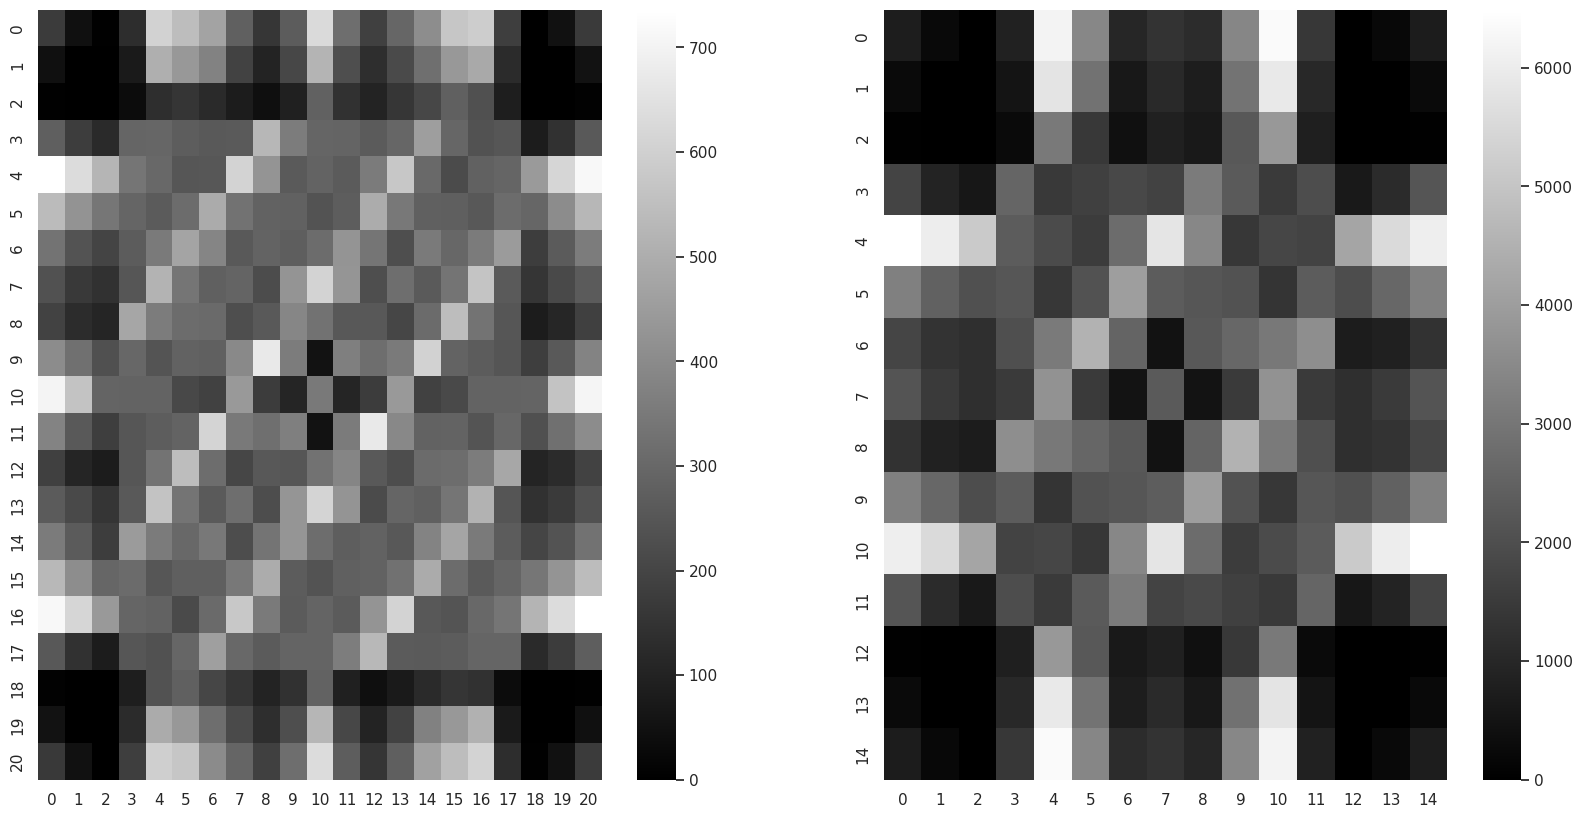

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

_, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10));
sns.heatmap(normal_grids_sum, ax=ax2,cmap="binary_r");
sns.heatmap(sunday_grids_sum, ax=ax1,cmap="binary_r");

In [8]:
import plotly.express as px
from plotly.subplots import make_subplots
fig, ax1, ax2 = make_subplots(1,2)
# px.imshow(normal_grids_sum,c)

In [9]:
across_df = pd.DataFrame([cw_json['clues']['across'],cw_json['answers']['across']])

In [10]:
across_df.T

0      1
0                          1. At another time   ANON
1                                   5. Eatery  DINER
2                      10. Cribbage equipment   PEGS
3                      14. Conqueror of polio   SALK
4                                   18. Exact   LEVY
..                                        ...    ...
66                             116. Beginning   GERM
67                                  117. Last   WEAR
68  118. "The Way You ___ Tonight," 1936 song   LOOK
69                         119. Popular cloth  DENIM
70                          120. Jane or Zane   GREY

[71 rows x 2 columns]

In [12]:
from jupyter_dash import JupyterDash
import dash
from dash import  dcc, html
from dash.dependencies import Input,Output
app = JupyterDash(__name__)
fig, ax1, ax2 = make_subplots(1,2)
ax1 = px.imshow(normal_grids_sum)
ax2 = px.imshow(sunday_grids_sum)

app.layout = html.Div([
    html.H1("Grid Heatmaps"),
    dcc.Graph(id='graph'),
    html.Label([
        "colorscale",
        dcc.Dropdown(
            id='colorscale-dropdown', clearable=False,
            value='plasma', options=[
                {'label': c, 'value': c}
                for c in px.colors.named_colorscales()
            ])
    ]),
])

# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("colorscale-dropdown", "value")]
)
def update_figure(colorscale):
    return px.imshow(normal_grids_sum,title="Heatmap of Black Boxes in 15x15 puzzles")

app.run_server(mode="jupyterlab")

In [12]:
csv = pd.read_csv("../data/clues.bz2", encoding='iso8859_1', compression='bz2',sep="\t",lineterminator='\n',error_bad_lines=False,names=['answer',''])

/tmp/ipykernel_159504/4108787271.py:1: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



b'Skipping line 4781380: expected 2 fields, saw 12\n'
/tmp/ipykernel_159504/4108787271.py:1: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.



In [30]:
import bz2
import pandas as pd
import chardet
with bz2.open('../data/clues.bz2',mode="rb",) as f:
    for i in range(0,84797):
        print(chardet.detect(f.readline()))

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confiden

In [31]:
f = pd.read_csv(bz2.open('../data/clues.bz2'),sep='\t')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 84797: invalid continuation byte

In [ ]:
csv.head(200)

In [32]:
cw_json


{'acrossmap': None,
 'admin': False,
 'answers': {'across': ['ASPIC',
   'CARA',
   'NABS',
   'THENATURAL',
   'ACRO',
   'WORKPERMIT',
   'STIR',
   'TROWEL',
   'FLIPSIDE',
   'EREBUS',
   'EAVES',
   'OPEL',
   'VELAZQUEZ',
   'COALBIN',
   'TAU',
   'DIP',
   'TOSSES',
   'COPULA',
   'SLY',
   'LEM',
   'SHTETLS',
   'STEADYJOB',
   'RYAS',
   'CHARM',
   'CAPRIS',
   'LARAIDER',
   'ABODES',
   'ORGS',
   'ENDOFANERA',
   'SKEE',
   'MAINFRAMES',
   'ESTD',
   'SENT',
   'SLOSH'],
  'down': ['ATWT',
   'SHOR',
   'PERO',
   'INKWELLS',
   'CAPER',
   'CUR',
   'ARMFUL',
   'RAILSAT',
   'ALTI',
   'NASSAU',
   'ACTIVEDUTY',
   'BRIDEZILLA',
   'SORES',
   'TELEVISED',
   'PEQUOT',
   'BEN',
   'OCTS',
   'POOLSHARKS',
   'EASYTARGET',
   'ZACHBRAFF',
   'BELAMI',
   'PASS',
   'PERSONAL',
   'MYCENAE',
   'SOP',
   'ERASED',
   'JARDIN',
   'CLOSE',
   'IBARS',
   'DEMS',
   'DEMO',
   'ERES',
   'SASH',
   'ONT']},
 'author': 'Karen M. Tracey',
 'autowrap': None,
 'bbars': None

In [33]:
cw_json['grid']

['A',
 'S',
 'P',
 'I',
 'C',
 '.',
 'C',
 'A',
 'R',
 'A',
 '.',
 'N',
 'A',
 'B',
 'S',
 'T',
 'H',
 'E',
 'N',
 'A',
 'T',
 'U',
 'R',
 'A',
 'L',
 '.',
 'A',
 'C',
 'R',
 'O',
 'W',
 'O',
 'R',
 'K',
 'P',
 'E',
 'R',
 'M',
 'I',
 'T',
 '.',
 'S',
 'T',
 'I',
 'R',
 'T',
 'R',
 'O',
 'W',
 'E',
 'L',
 '.',
 'F',
 'L',
 'I',
 'P',
 'S',
 'I',
 'D',
 'E',
 '.',
 '.',
 '.',
 'E',
 'R',
 'E',
 'B',
 'U',
 'S',
 '.',
 'E',
 'A',
 'V',
 'E',
 'S',
 'O',
 'P',
 'E',
 'L',
 '.',
 'V',
 'E',
 'L',
 'A',
 'Z',
 'Q',
 'U',
 'E',
 'Z',
 '.',
 'C',
 'O',
 'A',
 'L',
 'B',
 'I',
 'N',
 '.',
 'T',
 'A',
 'U',
 '.',
 'D',
 'I',
 'P',
 'T',
 'O',
 'S',
 'S',
 'E',
 'S',
 '.',
 '.',
 '.',
 'C',
 'O',
 'P',
 'U',
 'L',
 'A',
 'S',
 'L',
 'Y',
 '.',
 'L',
 'E',
 'M',
 '.',
 'S',
 'H',
 'T',
 'E',
 'T',
 'L',
 'S',
 '.',
 'S',
 'T',
 'E',
 'A',
 'D',
 'Y',
 'J',
 'O',
 'B',
 '.',
 'R',
 'Y',
 'A',
 'S',
 'C',
 'H',
 'A',
 'R',
 'M',
 '.',
 'C',
 'A',
 'P',
 'R',
 'I',
 'S',
 '.',
 '.',
 '.',
 'L',
 'A'